In [ ]:
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
xls = pd.ExcelFile('Conformación de los Grupos Económicos y su Comportamiento Tributario.xlsx')

In [ ]:
xls.sheet_names

['RESUMEN DE GRUPOS ECONÓMICO',
 'DETALLE DE CONFORMACIÓN',
 'RESUMEN DE RECAUDACIÓN',
 'SALIDA DE DIVISAS',
 'PANAMÁ PAPERS',
 'PARTICIPACIÓN',
 'PT',
 'DEUDA GENERADA',
 'RELACIONES INTERGRUPOS',
 'TABLA DETALLE CONFORMACIÓN']

In [ ]:
df1 = pd.read_excel(xls, sheet_name='RESUMEN DE GRUPOS ECONÓMICO', header=4)
df1 = df1[:len(df1)-17]
df1

,Ranking \n(1) Tamaño 2021,Ranking \n(1) Tamaño 2020,Variación Ranking Tamaño 2020 - 2021,NUEVO\nGE,\nNombre Grupo Económico,Reporta sus BENEFICIARIOS EFECTIVOS \n(*),No. de Integrantes domiciliados en PARAÍSOS FISCALES\n(**),No. de Integrantes y Empresas Offshore relacionadas con el Grupo Económico publicados en PANAMÁ PAPERS (***),Personas \nNaturales (a),Personas \nExtranjeras (b),...,Impuesto Causado ISD 2019,Impuesto Causado IAE 2020 (5),Impuesto Causado IAE 2019 (5),Total Activo \n(6) 2020,Total Activo \n(6) 2019,Total Patrimonio (7) 2020,Total Patrimonio \n(7) 2019,\nTotal Recaudado (8) 2020,\nTotal Recaudado (8) 2019,\nTotal Deuda Generada \n(9)
0,1,1.0,0.0,NaN,"BANCO PICHINCHA (DINERS CLUB DEL ECUADOR, BANC...",PARCIALMENTE,2.0,0.0,3.0,1.0,...,221893.35,3509949.0,3577970.0,1.894902e+10,1.792876e+10,3.688293e+09,3.699749e+09,588975950.0,667872172.0,NaN
1,2,2.0,0.0,NaN,"ALMACENES JUAN ELJURI (BANCO DEL AUSTRO, AEKIA...",PARCIALMENTE,45.0,42.0,17.0,19.0,...,4339679.14,796827.0,945874.0,6.417335e+09,6.436091e+09,1.878733e+09,1.955377e+09,127087663.0,190328750.0,NaN
2,3,3.0,0.0,NaN,"CORPORACIÓN FAVORITA (COMERCIAL KIWY, SUKASA, ...",PARCIALMENTE,4.0,5.0,20.0,3.0,...,1617777.87,0.0,0.0,3.448646e+09,3.343835e+09,2.427005e+09,2.314556e+09,144524011.0,139310219.0,NaN
3,4,5.0,1.0,NaN,"BANCO DE GUAYAQUIL (CORPORACION MULTIBG, FIDEI...",SI,2.0,0.0,9.0,0.0,...,86918.43,4785739.0,5678838.0,6.014463e+09,5.334073e+09,7.840423e+08,7.919991e+08,206200661.0,234359513.0,NaN
4,5,4.0,-1.0,NaN,SCHLUMBERGER DEL ECUADOR (CONSORCIO SHUSHUFIND...,NO,8.0,0.0,0.0,0.0,...,237591.28,0.0,0.0,3.286786e+09,3.616608e+09,2.426480e+09,2.305837e+09,202204211.0,152342627.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,298,283.0,-15.0,X,PRACTIPOWER (DISTRIBLU),SI,0.0,0.0,1.0,1.0,...,0.00,0.0,0.0,5.745528e+06,8.628450e+06,6.101450e+05,7.329120e+05,342714.0,772437.0,NaN
298,299,285.0,-14.0,NaN,COMERCIALIZADORA INTERNACIONAL CIECOPALMA (EXT...,SI,0.0,0.0,2.0,0.0,...,1792.76,0.0,0.0,3.558880e+07,3.840941e+07,-7.100702e+06,-5.790622e+06,28675.0,228358.0,NaN
299,300,294.0,-6.0,X,"EXORBAN (EXPORTMARSA, CLUB DEPORTIVO ESPECIALI...",SI,0.0,0.0,2.0,0.0,...,0.00,0.0,0.0,5.648737e+06,6.120840e+06,1.022284e+06,1.082467e+06,262281.0,440767.0,NaN
300,301,301.0,0.0,NaN,"CONSULTORA TECNAZUL (AZULEC, CATERPREMIER, COM...",SI,0.0,0.0,1.0,0.0,...,0.00,0.0,0.0,1.408532e+07,3.501908e+07,9.896548e+06,1.825076e+07,277990.0,508853.0,NaN


In [ ]:
df1.keys

<bound method NDFrame.keys of     Ranking \n(1) Tamaño  2021  Ranking \n(1) Tamaño  2020  \
0                            1                         1.0   
1                            2                         2.0   
2                            3                         3.0   
3                            4                         5.0   
4                            5                         4.0   
..                         ...                         ...   
297                        298                       283.0   
298                        299                       285.0   
299                        300                       294.0   
300                        301                       301.0   
301                        302                       302.0   

     Variación Ranking Tamaño 2020 - 2021 NUEVO\nGE  \
0                                     0.0       NaN   
1                                     0.0       NaN   
2                                     0.0       NaN   
3    

In [ ]:
max = df1.loc[df1['Ranking \n(1) Tamaño  2021'] < df1['Ranking \n(1) Tamaño  2020']].count()[0]
min = df1.loc[df1['Ranking \n(1) Tamaño  2021'] > df1['Ranking \n(1) Tamaño  2020']].count()[0]
print('Empresas que mejoraron de rango ', min)
print('Empresas que empeoraron de rango ', max)

Empresas que mejoraron de rango  122
Empresas que empeoraron de rango  164


# Generar gráfico de barras de solo las empresas que han mejorado y/o empeorado su ranking con respecto al año anterior.

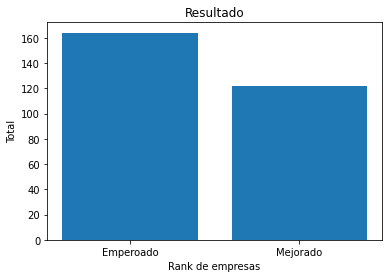

In [ ]:
label = ['Emperoado', 'Mejorado']
values = [max, min]
plt.bar(label, values)
plt.ylabel('Total')
plt.xlabel('Rank de empresas')
plt.title('Resultado')
plt.show()

# Generar gráfico de las empresas que tienen panamá papers.

In [ ]:
panama = df1.loc[df1['No. de Integrantes y Empresas Offshore relacionadas con el Grupo Económico publicados en PANAMÁ PAPERS (***)'] > 0].count()[0]
print('Total de empresas que cuentan con PANAMÁ PAPERS', panama)

Total de empresas que cuentan con PANAMÁ PAPERS 58


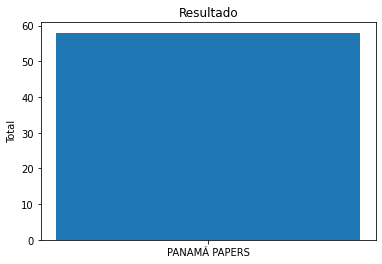

In [ ]:
label = 'PANAMÁ PAPERS'
plt.bar(label, panama)
plt.ylabel('Total')
plt.title('Resultado')
plt.show()

# Generar un pie de las empresas que más aportan a la economía del país.

In [ ]:
aporte = df1.sort_values('\nTotal Recaudado (8) 2020', ascending=False)[:10]
aporte

,Ranking \n(1) Tamaño 2021,Ranking \n(1) Tamaño 2020,Variación Ranking Tamaño 2020 - 2021,NUEVO\nGE,\nNombre Grupo Económico,Reporta sus BENEFICIARIOS EFECTIVOS \n(*),No. de Integrantes domiciliados en PARAÍSOS FISCALES\n(**),No. de Integrantes y Empresas Offshore relacionadas con el Grupo Económico publicados en PANAMÁ PAPERS (***),Personas \nNaturales (a),Personas \nExtranjeras (b),...,Impuesto Causado ISD 2019,Impuesto Causado IAE 2020 (5),Impuesto Causado IAE 2019 (5),Total Activo \n(6) 2020,Total Activo \n(6) 2019,Total Patrimonio (7) 2020,Total Patrimonio \n(7) 2019,\nTotal Recaudado (8) 2020,\nTotal Recaudado (8) 2019,\nTotal Deuda Generada \n(9)
0,1,1.0,0.0,NaN,"BANCO PICHINCHA (DINERS CLUB DEL ECUADOR, BANC...",PARCIALMENTE,2.0,0.0,3.0,1.0,...,221893.35,3509949.0,3577970.0,1.894902e+10,1.792876e+10,3.688293e+09,3.699749e+09,588975950.0,667872172.0,NaN
11,12,13.0,1.0,NaN,"DINADEC (CERVECERIA NACIONAL CN, BEVERAGE BRAN...",NO,2.0,0.0,0.0,0.0,...,211597.76,1623.0,3411.0,1.173172e+09,1.055146e+09,4.984073e+08,4.818853e+08,415846228.0,427107715.0,NaN
10,11,10.0,-1.0,NaN,"CLARO (AMOVECUADOR, FIDEICOMISO MERCANTIL DE A...",NO,0.0,0.0,0.0,0.0,...,3633042.54,0.0,0.0,1.607871e+09,1.789005e+09,6.275890e+08,5.202549e+08,252930981.0,190495917.0,NaN
5,6,6.0,0.0,NaN,"PRODUBANCO (SERVIPAGOS, PROTRAMITES TRAMITES P...",PARCIALMENTE,7.0,0.0,0.0,2.0,...,504808.17,1109933.0,1369521.0,5.677059e+09,5.337383e+09,5.541985e+08,5.711326e+08,233528010.0,299941053.0,NaN
3,4,5.0,1.0,NaN,"BANCO DE GUAYAQUIL (CORPORACION MULTIBG, FIDEI...",SI,2.0,0.0,9.0,0.0,...,86918.43,4785739.0,5678838.0,6.014463e+09,5.334073e+09,7.840423e+08,7.919991e+08,206200661.0,234359513.0,NaN
4,5,4.0,-1.0,NaN,SCHLUMBERGER DEL ECUADOR (CONSORCIO SHUSHUFIND...,NO,8.0,0.0,0.0,0.0,...,237591.28,0.0,0.0,3.286786e+09,3.616608e+09,2.426480e+09,2.305837e+09,202204211.0,152342627.0,NaN
7,8,9.0,1.0,NaN,"BANCO BOLIVARIANO C.A. (SASETAF, DESINVEST)",SI,1.0,0.0,3.0,3.0,...,17093.67,9817255.0,7702248.0,4.241323e+09,3.828371e+09,5.978779e+08,5.712858e+08,193190178.0,209149340.0,NaN
9,10,11.0,1.0,NaN,BANCO INTERNACIONAL (FIDEICOMISO BANCO INTERNA...,SI,10.0,4.0,0.0,1.0,...,55.85,980730.0,781507.0,3.977631e+09,3.805740e+09,3.920152e+08,3.915141e+08,170429336.0,182165876.0,NaN
12,13,12.0,-1.0,NaN,"ARCA ECUADOR (DISTRIBUIDORA IMPORTADORA DIPOR,...",NO,4.0,0.0,0.0,0.0,...,16689.82,0.0,0.0,1.059893e+09,1.045247e+09,5.470628e+08,5.289207e+08,153469511.0,168714088.0,NaN
2,3,3.0,0.0,NaN,"CORPORACIÓN FAVORITA (COMERCIAL KIWY, SUKASA, ...",PARCIALMENTE,4.0,5.0,20.0,3.0,...,1617777.87,0.0,0.0,3.448646e+09,3.343835e+09,2.427005e+09,2.314556e+09,144524011.0,139310219.0,NaN


In [ ]:
fig = px.pie(aporte, values=aporte['\nTotal Recaudado (8) 2020'], names=aporte['\nNombre Grupo Económico'], title='Mayor Aporte')
fig.show()

# Obtener las empresas que mayor patrimonio tienen (10).

In [ ]:
patrimonio = df1.sort_values('Total Patrimonio (7) 2020', ascending=False)[:10]
patrimonio

,Ranking \n(1) Tamaño 2021,Ranking \n(1) Tamaño 2020,Variación Ranking Tamaño 2020 - 2021,NUEVO\nGE,\nNombre Grupo Económico,Reporta sus BENEFICIARIOS EFECTIVOS \n(*),No. de Integrantes domiciliados en PARAÍSOS FISCALES\n(**),No. de Integrantes y Empresas Offshore relacionadas con el Grupo Económico publicados en PANAMÁ PAPERS (***),Personas \nNaturales (a),Personas \nExtranjeras (b),...,Impuesto Causado ISD 2019,Impuesto Causado IAE 2020 (5),Impuesto Causado IAE 2019 (5),Total Activo \n(6) 2020,Total Activo \n(6) 2019,Total Patrimonio (7) 2020,Total Patrimonio \n(7) 2019,\nTotal Recaudado (8) 2020,\nTotal Recaudado (8) 2019,\nTotal Deuda Generada \n(9)
0,1,1.0,0.0,NaN,"BANCO PICHINCHA (DINERS CLUB DEL ECUADOR, BANC...",PARCIALMENTE,2.0,0.0,3.0,1.0,...,221893.35,3509949.0,3577970.0,1.894902e+10,1.792876e+10,3.688293e+09,3.699749e+09,588975950.0,667872172.0,NaN
2,3,3.0,0.0,NaN,"CORPORACIÓN FAVORITA (COMERCIAL KIWY, SUKASA, ...",PARCIALMENTE,4.0,5.0,20.0,3.0,...,1617777.87,0.0,0.0,3.448646e+09,3.343835e+09,2.427005e+09,2.314556e+09,144524011.0,139310219.0,NaN
4,5,4.0,-1.0,NaN,SCHLUMBERGER DEL ECUADOR (CONSORCIO SHUSHUFIND...,NO,8.0,0.0,0.0,0.0,...,237591.28,0.0,0.0,3.286786e+09,3.616608e+09,2.426480e+09,2.305837e+09,202204211.0,152342627.0,NaN
1,2,2.0,0.0,NaN,"ALMACENES JUAN ELJURI (BANCO DEL AUSTRO, AEKIA...",PARCIALMENTE,45.0,42.0,17.0,19.0,...,4339679.14,796827.0,945874.0,6.417335e+09,6.436091e+09,1.878733e+09,1.955377e+09,127087663.0,190328750.0,NaN
6,7,7.0,0.0,NaN,"OCP ECUADOR (ANDES PETROLEUM, CONSORCIO B-16, ...",PARCIALMENTE,12.0,33.0,0.0,10.0,...,2621454.37,0.0,0.0,2.878285e+09,3.158582e+09,1.282071e+09,1.455499e+09,66287611.0,78336419.0,NaN
13,14,15.0,1.0,NaN,"INDUSTRIAL PESQUERA SANTA PRISCILA (MANESIL, P...",SI,0.0,4.0,9.0,1.0,...,107180.16,0.0,0.0,1.217713e+09,1.085628e+09,8.937435e+08,8.250925e+08,29621731.0,26298006.0,NaN
20,21,20.0,-1.0,NaN,"CONSTRUCTORA HIDALGO E HIDALGO (CONCEGUA, CONO...",SI,0.0,0.0,4.0,0.0,...,564.92,0.0,0.0,1.281664e+09,1.227155e+09,8.155598e+08,7.336931e+08,35529853.0,41946538.0,NaN
3,4,5.0,1.0,NaN,"BANCO DE GUAYAQUIL (CORPORACION MULTIBG, FIDEI...",SI,2.0,0.0,9.0,0.0,...,86918.43,4785739.0,5678838.0,6.014463e+09,5.334073e+09,7.840423e+08,7.919991e+08,206200661.0,234359513.0,NaN
35,36,43.0,7.0,NaN,"HERDOIZA CRESPO CONSTRUCCIONES (CANEYBI, PANAV...",SI,0.0,2.0,5.0,0.0,...,3368.99,0.0,0.0,8.186418e+08,7.893139e+08,6.704860e+08,6.508094e+08,12273241.0,16327751.0,NaN
14,15,14.0,-1.0,NaN,"KFC (INT FOOD SERVICES CORP, AVÍCOLA SAN ISIDR...",PARCIALMENTE,13.0,13.0,22.0,2.0,...,208454.70,0.0,0.0,1.524856e+09,1.613037e+09,6.409647e+08,6.576092e+08,41346914.0,51212253.0,NaN


In [ ]:
fig = px.pie(patrimonio, values=patrimonio['Total Patrimonio (7) 2020'], names=patrimonio['\nNombre Grupo Económico'], title='Patrimonio')
fig.show()

# Conclusión

El Ecuador cuenta con grandes empreseas que aportan sustancialmente a la aeconomia, segun el analisis y las graficas se puede verificar la importancia de estas empresas, las graficas aydan a identificar los valores y datos que en un listado no se pueden identificar fasilmente.

# Recomendaciones

El filtrado de datos es indispensable, considerar que el archivo cuenta con datos textuales que deben ser omitidos.